# Fit a RL model on hierarchical data

## Import the data

In [1]:
from rlssm.utility.load_data import load_example_dataset

# import some example data:
data = load_example_dataset(hierarchical_levels=2)

data.head()

,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,feedback_type
0,1,1,1,43,39,2,1,1,1.244082,0,0
1,1,1,2,60,50,4,3,1,1.101821,1,0
2,1,1,3,44,36,4,2,2,1.029923,0,0
3,1,1,4,55,55,4,3,2,1.368007,0,0
4,1,1,5,52,49,4,3,3,1.039329,1,0


## Initialize the model

In [2]:
from rlssm.model.models_RL import RLModel_2A

# you can "turn on and off" different mechanisms:
model = RLModel_2A(hierarchical_levels=2,
                   increasing_sensitivity=False,
                   separate_learning_rates=True)

## Fit

In [3]:
# sampling parameters
n_warmup = 1000
n_sampling = 2000
n_chains = 2

# learning parameters
K = 4  # n options in a learning block (participants see 2 at a time)
initial_value_learning = 27.5  # initial learning value (Q0)

In [4]:
model_fit = model.fit(
    data,
    K,
    initial_value_learning,
    iter_warmup=n_warmup,
    iter_sampling=n_sampling,
    chains=n_chains)

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

### get Rhat

In [5]:
model_fit.rhat.describe()

,rhat
count,12871.000000
mean,1.000238
std,0.001791
min,0.999500
25%,0.999673
50%,0.999854
75%,1.000200
max,1.019560


### get wAIC

In [6]:
model_fit.waic

{'lppd': -2586.1812861456197,
 'p_waic': 48.50262540576477,
 'waic': 5269.367823102769,
 'waic_se': 90.3372691052062}

## Posteriors

In [7]:
model_fit.samples.describe()

,transf_mu_alpha_neg,alpha_pos_sbj[1],alpha_pos_sbj[2],alpha_pos_sbj[3],alpha_pos_sbj[4],alpha_pos_sbj[5],alpha_pos_sbj[6],alpha_pos_sbj[7],alpha_pos_sbj[8],alpha_pos_sbj[9],...,sensitivity_sbj[18],sensitivity_sbj[19],sensitivity_sbj[20],sensitivity_sbj[21],sensitivity_sbj[22],sensitivity_sbj[23],sensitivity_sbj[24],sensitivity_sbj[25],sensitivity_sbj[26],sensitivity_sbj[27]
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.240462,0.042295,0.013034,0.072579,0.100514,0.102565,0.066043,0.069262,0.090670,0.149465,...,0.083522,0.311762,0.374064,0.771872,0.590459,0.897192,0.428078,0.606193,0.083504,0.248375
std,0.035131,0.021415,0.005698,0.037804,0.044275,0.042711,0.035449,0.026514,0.062456,0.053172,...,0.050926,0.072750,0.057197,0.179761,0.112795,0.196488,0.079174,0.152543,0.020417,0.047372
min,0.138512,0.007343,0.002727,0.001812,0.022855,0.019376,0.013994,0.006321,0.006247,0.029515,...,0.025832,0.152194,0.213218,0.339404,0.281091,0.434415,0.220810,0.195080,0.022461,0.127889
25%,0.215491,0.028424,0.009298,0.050662,0.068498,0.072186,0.041677,0.050571,0.043018,0.111361,...,0.059509,0.259064,0.333866,0.649748,0.514101,0.754532,0.373564,0.495067,0.069821,0.216145
50%,0.238322,0.037106,0.011525,0.068560,0.091518,0.094867,0.058013,0.065250,0.074487,0.140777,...,0.072102,0.302260,0.369209,0.745942,0.574610,0.873420,0.418792,0.593111,0.081787,0.241859
75%,0.262427,0.050428,0.015242,0.092069,0.123818,0.126426,0.080417,0.084776,0.120641,0.179264,...,0.088449,0.354398,0.408279,0.858400,0.652728,1.014200,0.471611,0.697904,0.094932,0.274906
max,0.377470,0.211263,0.055204,0.325869,0.384058,0.345195,0.349085,0.205499,0.451205,0.469186,...,0.832813,0.671714,0.704821,1.750800,1.331590,1.789500,1.029140,1.748300,0.257151,0.570602


In [8]:
import seaborn as sns

sns.set(context="talk",
        style="white",
        palette="husl",
        rc={'figure.figsize': (15, 8)})

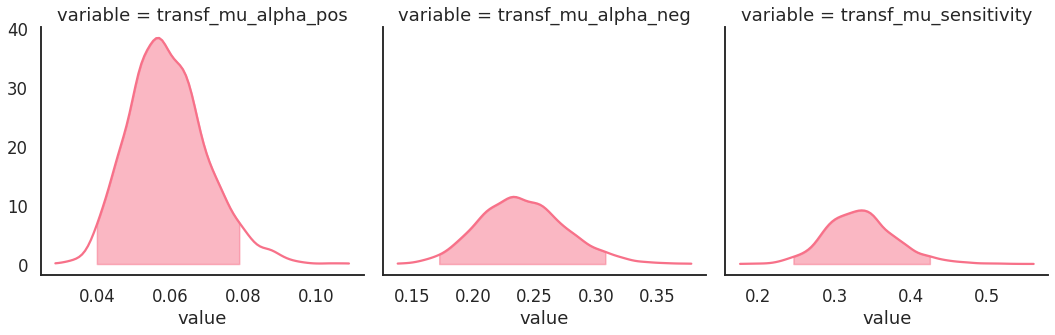

In [9]:
model_fit.plot_posteriors(height=5, show_intervals="HDI", alpha_intervals=.05);

## Posterior predictives

### Ungrouped

In [10]:
pp = model_fit.get_posterior_predictives_df(n_posterior_predictives=500)
pp

variable accuracy                                               ...            \
trial        1    2    3    4    5    6    7    8    9    10    ... 6455 6456   
sample                                                          ...             
1               1    0    1    1    1    0    0    1    1    1  ...    1    1   
2               1    1    0    1    0    0    1    0    0    1  ...    1    1   
3               1    0    1    0    0    1    0    0    1    0  ...    1    1   
4               1    1    1    0    0    1    0    0    1    1  ...    1    1   
5               1    0    1    1    0    1    0    1    0    1  ...    1    0   
...           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
496             0    1    1    1    1    1    0    0    1    1  ...    1    1   
497             1    1    0    0    1    1    0    1    1    1  ...    0    1   
498             0    0    0    1    1    1    1    0    1    1  ...    1    1   
499             0    1    1    0    0    1    0    0    1    1  ...    1    1   
500             1    0    0    1    0    0    1    1    1    1  ...    0    1   

variable                                          
trial    6457 6458 6459 6460 6461 6462 6463 6464  
sample                                            
1           1    1    1    1    1    0    1    1  
2           1    1    1    1    1    1    1    1  
3           1    1    1    0    1    0    1    1  
4           1    1    1    1    1    1    1    1  
5           1    1    1    1    1    1    1    1  
...       ...  ...  ...  ...  ...  ...  ...  ...  
496         1    0    1    1    1    0    1    1  
497         1    1    1    1    1    0    1    1  
498         1    1    1    1    1    1    1    1  
499         1    1    1    0    1    0    1    1  
500         1    1    1    1    1    0    1    0  

[500 rows x 6464 columns]

In [11]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=500)
pp_summary

,mean_accuracy
sample,
1,0.799041
2,0.805693
3,0.804146
4,0.795173
5,0.806157
...,...
496,0.803063
497,0.803063
498,0.801361


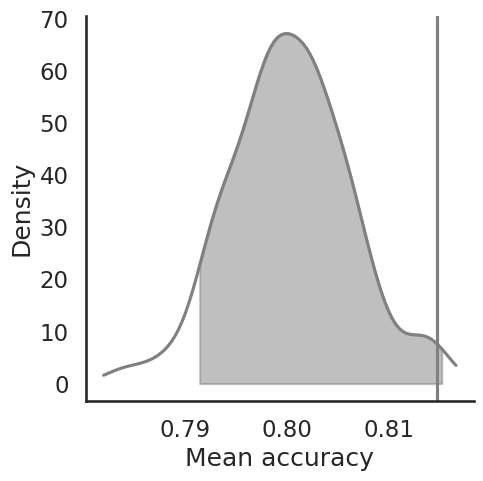

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

model_fit.plot_mean_posterior_predictives(n_posterior_predictives=500, ax=ax, show_intervals='HDI')

ax.set_ylabel('Density')
ax.set_xlabel('Mean accuracy')

sns.despine()

### Grouped

In [13]:
import numpy as np
import pandas as pd

# Define new grouping variables, in this case, for the different choice pairs, but any grouping var can do
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [14]:
model_fit.get_grouped_posterior_predictives_summary(grouping_vars=['block_label', 'block_bins', 'choice_pair'],
                                                    n_posterior_predictives=500)

mean_accuracy
block_label block_bins choice_pair sample               
1           1          AB          1            0.492063
                                   2            0.571429
                                   3            0.523810
                                   4            0.555556
                                   5            0.476190
...                                                  ...
3           8          CD          496          0.740741
                                   497          0.796296
                                   498          0.833333
                                   499          0.703704
                                   500          0.648148

[48000 rows x 1 columns]

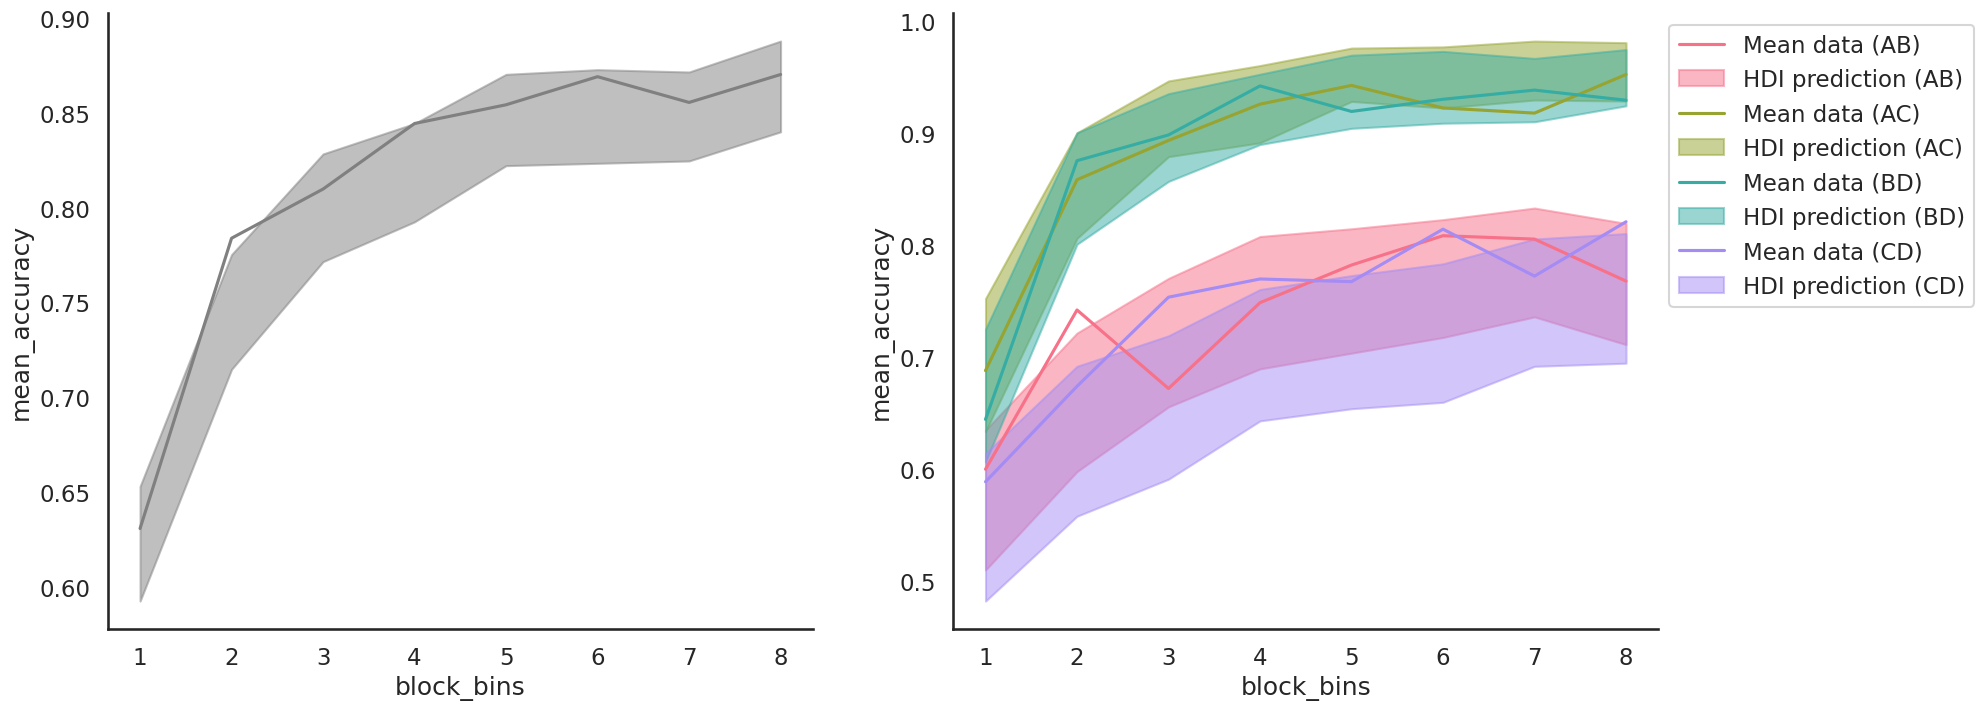

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'], n_posterior_predictives=500, ax=axes[0])

model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins', 'choice_pair'],
                                                  n_posterior_predictives=500, ax=axes[1])

sns.despine()